Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_1 (Masking)             │ (None, 20, 2)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_20 (SimpleRNN)       │ (None, 20, 32)         │         1,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_21 (SimpleRNN)       │ (None, 16)             │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,938 (7.57 KB)

 Trainable params: 1,938 (7.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4071/4071 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - loss: 14834.9395
Epoch 2/10
4071/4071 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - loss: 7061.1431
Epoch 3/10
4071/4071 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - loss: 4728.6577
Epoch 4/10
4071/4071 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - loss: 3647.4316
Epoch 5/10
4071/4071 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - loss: 2899.4915
Epoch 6/10
4071/4071 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - loss: 2545.4331
Epoch 7/10
4071/4071 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - loss: 2351.5386
Epoch 8/10
4071/4071 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - loss: 2373.7966
Epoch 9/10
4071/4071 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - loss: 2435.5706
Epoch 10/10
4071/4071 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - loss: 2402.5986


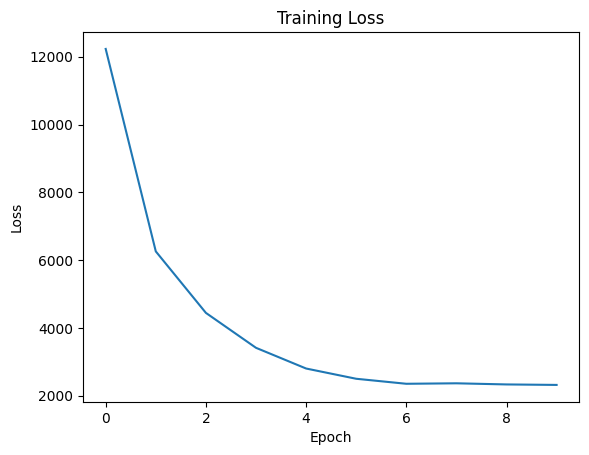

453/453 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2258.8684
Loss: 2235.6591796875
453/453 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [87]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import json
import random
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load data
with open('output_data_rnn.json', 'r') as f:
    data = json.load(f)

# Split data into input sequences (X) and output points (Y)
X = []
Y = []
MAX_SEQUENCE_LENGTH = 20  # Set a maximum sequence length for truncation
for i in range(len(data)):
    cut_each_at = random.randint(1, len(data[i]) - 1)
    X_sequence = data[i][:cut_each_at]
    X.append(X_sequence[:MAX_SEQUENCE_LENGTH])  # Truncate to MAX_SEQUENCE_LENGTH if longer
    Y.append(data[i][cut_each_at])

# Pad sequences to the maximum specified length
X_padded = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH, padding='post', dtype='float32')  # Pad with zeros if shorter

# Split into training and testing sets
n = len(X_padded)
n_train = int(0.9 * n)
X_train = X_padded[:n_train]
Y_train = np.array(Y[:n_train])
X_test = X_padded[n_train:]
Y_test = np.array(Y[n_train:])

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Masking(mask_value=0.0, input_shape=(MAX_SEQUENCE_LENGTH, 2)),  # Mask padded values
    tf.keras.layers.SimpleRNN(32, activation='tanh', return_sequences=True),
    tf.keras.layers.SimpleRNN(16, activation='tanh'),
    tf.keras.layers.Dense(2)  # Output layer with 2 neurons for x, y coordinates
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Train the model
history = model.fit(X_train, Y_train, epochs=10, batch_size=32)

# Plot the loss
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# Evaluate the model
loss = model.evaluate(X_test, Y_test)
print('Loss:', loss)

# Make predictions
Y_pred = model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[209.58296    118.73541   ]
 [214.77391    135.78935   ]
 [217.86687    154.88937   ]
 [206.85617    182.9375    ]
 [188.92062    209.18893   ]
 [156.27481    217.82597   ]
 [116.868614   213.38289   ]
 [ 72.41912    213.23558   ]
 [ 32.045303   204.11644   ]
 [ 10.055397   187.71852   ]
 [  2.162781   156.05902   ]
 [  0.94470763 121.90101   ]
 [ 15.5406475   96.896484  ]
 [ 35.547745    82.610214  ]
 [ 61.32809     84.3909

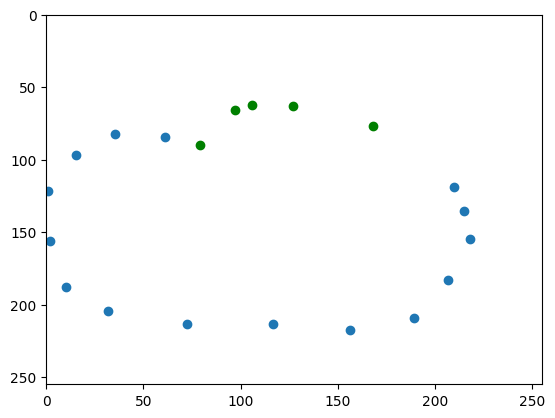

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure op is properly initialized
# Assuming X_test_static is a list of arrays
op = [np.array(X_test_static[0])]

# Predict the next 10 steps from op[0]
op[0] = op[0][1:]
op[0] = np.vstack([op[0], Y_pred[0]])
Y_pred_next = []

for _ in range(15):
    pred = model.predict(np.array(op[0:1]).reshape(1, 5, 2))
    Y_pred_next.append(pred)
    op[0] = op[0][1:]
    op[0] = np.vstack([op[0], pred])

Y_pred_next = np.array(Y_pred_next).reshape(15, 2)

print(Y_pred_next)
# plt satter plot
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.scatter(Y_pred_next[:, 0], Y_pred_next[:, 1])
plt.scatter(X_test_static[0][0:, 0], X_test_static[0][0:, 1], c='green')
plt.gca().invert_yaxis()

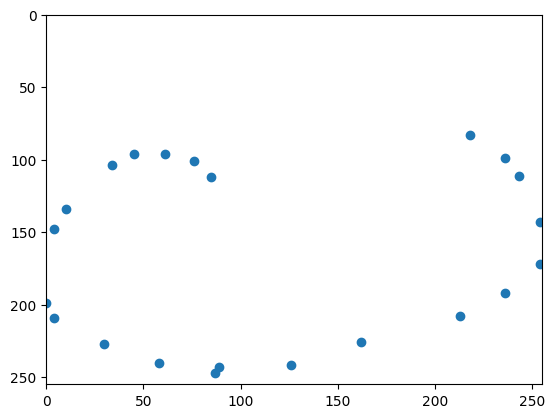

In [114]:
i=4
plt.xlim(0, 255)
plt.ylim(0, 255)
cut_each_at = random.randint(1, len(data[i]) - 1)
xes = data[i][:cut_each_at]
yes = data[i][cut_each_at]
xes_array = np.array(xes)
yes_array = np.array(yes)
plt.scatter(xes_array[:, 0], xes_array[:, 1])
plt.gca().invert_yaxis()
plt.show()